# 1. Detecting facial expressions from images

*Written by Jin Hyun Cheong and Eshin Jolly*

In this tutorial we'll explore the `Detector` class in more depth, demonstrating how to detect faces, facial landmarks, action units, and emotions from images. You can try it out interactively in Google Collab: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cosanlab/py-feat/blob/master/notebooks/content/02_detector_imgs.ipynb)

In [2]:
# Uncomment the line below and run this only if you're using Google Collab
!pip install numpy>=1.24.4
!pip install -q py-feat

## 1.1 Downloading models from HuggingFace and setting up a `Detector`

A `Detector` is a swiss-army-knife class that "glues" together a combination of *pre-trained* Face, Emotion, Pose, etc detection models into a single Python object. This allows us to provide a very easy-to-use high-level API, e.g. `detector.detect('my_image.jpg',data_type='image')`, which will automatically make use of the correct underlying model to solve the sub-tasks of identifying face locations, getting landmarks, extracting action units, etc.

The first time you initialize a `Detector` instance on your computer will take a moment as Py-Feat will automatically download required pretrained model weights for you from [our HuggingFace Repository](https://huggingface.co/py-feat) and save them to disk. Everytime after that it will use existing model weights.

You can find a list of default models [on this page](/models.md).


In [3]:
from feat import Detector

detector = Detector()
detector

# You can change which models you want during initialization, e.g.
# detector = Detector(emotion_model='svm')

100%|██████████| 1.79M/1.79M [00:00<00:00, 50.2MB/s]
100%|██████████| 12.3M/12.3M [00:00<00:00, 94.9MB/s]
100%|██████████| 966k/966k [00:00<00:00, 26.4MB/s]
100%|██████████| 33.6M/33.6M [00:00<00:00, 57.9MB/s]
100%|██████████| 130k/130k [00:00<00:00, 8.43MB/s]
100%|██████████| 45.9M/45.9M [00:00<00:00, 51.0MB/s]
100%|██████████| 130k/130k [00:00<00:00, 9.13MB/s]
100%|██████████| 53.9M/53.9M [00:01<00:00, 51.9MB/s]
100%|██████████| 130k/130k [00:00<00:00, 7.58MB/s]
100%|██████████| 167k/167k [00:00<00:00, 8.49MB/s]
100%|██████████| 531k/531k [00:00<00:00, 15.7MB/s]
100%|██████████| 494k/494k [00:00<00:00, 18.7MB/s]
100%|██████████| 207k/207k [00:00<00:00, 11.2MB/s]
100%|██████████| 1.15M/1.15M [00:00<00:00, 31.0MB/s]
100%|██████████| 572k/572k [00:00<00:00, 20.2MB/s]
100%|██████████| 330k/330k [00:00<00:00, 12.3MB/s]
100%|██████████| 335k/335k [00:00<00:00, 13.9MB/s]
100%|██████████| 587k/587k [00:00<00:00, 19.0MB/s]
100%|██████████| 207k/207k [00:00<00:00, 9.26MB/s]
100%|██████████| 69

feat.detector.Detector(face_model=retinaface, landmark_model=mobilefacenet, au_model=xgb, emotion_model=resmasknet, facepose_model=img2pose, identity_model=facenet)

## 1.2 Processing a single image

Let's process a single image with a single face. Py-feat includes a demo image for this purpose called `single_face.jpg` so lets use that. You can also use the convenient `imshow` function which will automatically load an image into a numpy array if provided a path unlike matplotlib:

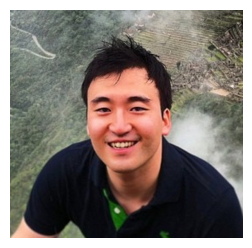

In [6]:
from feat.utils.io import get_test_data_path
from feat.plotting import imshow
import os

# Helper to point to the test data folder
test_data_dir = get_test_data_path()

# Get the full path
single_face_img_path = os.path.join(test_data_dir, "single_face.jpg")

# Plot it
imshow(single_face_img_path)

Now we use our initialized `detector` instance to make predictions with the `detect_image()` method. This is the main workhorse method that will perform face, landmark, au, and emotion detection using the loaded models. It always returns a `Fex` data instance:

In [8]:
single_face_prediction = detector.detect_image(single_face_img_path, data_type="image")
#not just detect()

type(single_face_prediction)  # instance of a Fex class

# Show results
single_face_prediction

100%|██████████| 1/1 [00:05<00:00,  5.62s/it]


FaceRectX   FaceRectY  FaceRectWidth  FaceRectHeight  FaceScore  \
0  192.507716  140.455324     179.352746      259.257723   0.999708   

          x_0         x_1         x_2        x_3         x_4  ...  \
0  187.430417  188.301032  190.157293  194.59644  203.539799  ...   

   Identity_505  Identity_506  Identity_507  Identity_508  Identity_509  \
0     -0.005776     -0.035352     -0.001157      0.001913      0.117051   

   Identity_510  Identity_511  Identity_512  \
0     -0.001347     -0.012121      0.029357   

                                               input  frame  
0  /usr/local/lib/python3.10/dist-packages/feat/t...      0  

[1 rows x 686 columns]

## 1.3 Working with `Fex` outputs

The output of any detection always returns a `Fex` data class instance. This class is a lightweight wrapper around a pandas dataframe that contains columns with values for detection type.

So you can use any pandas methods you're already familiar with:

In [9]:
# We always return a dataframe even if there's just a single row,
# i.e. no Series
single_face_prediction.head()

FaceRectX   FaceRectY  FaceRectWidth  FaceRectHeight  FaceScore  \
0  192.507716  140.455324     179.352746      259.257723   0.999708   

          x_0         x_1         x_2        x_3         x_4  ...  \
0  187.430417  188.301032  190.157293  194.59644  203.539799  ...   

   Identity_505  Identity_506  Identity_507  Identity_508  Identity_509  \
0     -0.005776     -0.035352     -0.001157      0.001913      0.117051   

   Identity_510  Identity_511  Identity_512  \
0     -0.001347     -0.012121      0.029357   

                                               input  frame  
0  /usr/local/lib/python3.10/dist-packages/feat/t...      0  

[1 rows x 686 columns]

`Fex` provides convenient attributes to access specific groups of columns so you don't have to write a bunch of pandas code to get the data you need:

In [10]:
single_face_prediction.faceboxes

FaceRectX   FaceRectY  FaceRectWidth  FaceRectHeight  FaceScore
0  192.507716  140.455324     179.352746      259.257723   0.999708

In [11]:
single_face_prediction.aus

AU01      AU02      AU04      AU05      AU06  AU07      AU09      AU10  \
0  0.607853  0.293292  0.055447  0.285801  0.917875   1.0  0.356386  0.619562   

   AU11      AU12      AU14      AU15      AU17  AU20      AU23      AU24  \
0   1.0  0.953904  0.722208  0.077237  0.154148   1.0  0.174083  0.014808   

       AU25      AU26      AU28      AU43  
0  0.999788  0.878682  0.030707  0.121119

In [12]:
single_face_prediction.emotions

anger   disgust      fear  happiness   sadness  surprise   neutral
0  0.00051  0.000026  0.002214   0.991036  0.000028  0.006158  0.000029

In [13]:
single_face_prediction.poses

Pitch      Roll       Yaw
0  0.811813 -3.737931  6.101119

In [14]:
single_face_prediction.identities

0    Person_0
Name: Identity, dtype: object

## 1.4 Saving and Loading detections from a file

Since a `Fex` object is just a sub-classed `DataFrames` we can use the `.to_csv` method to save our detections toa file:

In [15]:
single_face_prediction.to_csv("output.csv", index=False)

To create a new `Fex` instance from a csv file use our custom `read_feat()` function instead pf `pd.read_csv`:

In [17]:
from feat.utils.io import read_feat

#reads csv file and shows extracted features
input_prediction = read_feat("output.csv")

# We we can quick access features like beofre
input_prediction.aus

AU01      AU02      AU04      AU05      AU06  AU07      AU09      AU10  \
0  0.607853  0.293292  0.055447  0.285801  0.917875   1.0  0.356386  0.619562   

   AU11      AU12      AU14      AU15      AU17  AU20      AU23      AU24  \
0   1.0  0.953904  0.722208  0.077237  0.154148   1.0  0.174083  0.014808   

       AU25      AU26      AU28      AU43  
0  0.999788  0.878682  0.030707  0.121119

### Real-time saving during detection (low-memory mode)
You can also write `Fex` outputs to a file during detection by passing a `save` argument to `detect`. This will save the `Fex` output to a csv file every time a face is detected.

This can be useful when processing multiple images or videos (as we'll see later).

In [20]:
# use save to save fex output in csv file
fex = detector.detect_image(single_face_img_path, data_type="image", save='detections.csv')

fex.head()

100%|██████████| 1/1 [00:05<00:00,  5.05s/it]


FaceRectX   FaceRectY  FaceRectWidth  FaceRectHeight  FaceScore  \
0  192.507716  140.455324     179.352746      259.257723   0.999708   

          x_0         x_1         x_2        x_3         x_4  ...  \
0  187.430417  188.301032  190.157293  194.59644  203.539799  ...   

   Identity_505  Identity_506  Identity_507  Identity_508  Identity_509  \
0     -0.005776     -0.035352     -0.001157      0.001913      0.117051   

   Identity_510  Identity_511  Identity_512  \
0     -0.001347     -0.012121      0.029357   

                                               input  frame  
0  /usr/local/lib/python3.10/dist-packages/feat/t...      0  

[1 rows x 686 columns]

We can use our terminal to see that `detections.csv` exists and contains the same content as `fex`

In [28]:
%%bash
head output.csv

FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,y_0,y_1,y_2,y_3,y_4,y_5,y_6,y_7,y_8,y_9,y_10,y_11,y_12,y_13,y_14,y_15,y_16,y_17,y_18,y_19,y_20,y_21,y_22,y_23,y_24,y_25,y_26,y_27,y_28,y_29,y_30,y_31,y_32,y_33,y_34,y_35,y_36,y_37,y_38,y_39,y_40,y_41,y_42,y_43,y_44,y_45,y_46,y_47,y_48,y_49,y_50,y_51,y_52,y_53,y_54,y_55,y_56,y_57,y_58,y_59,y_60,y_61,y_62,y_63,y_64,y_65,y_66,y_67,Pitch,Roll,Yaw,AU01,AU02,AU04,AU05,AU06,AU07,AU09,AU10,AU11,AU12,AU14,AU15,AU17,AU20,AU23,AU24,AU25,AU26,AU28,AU43,anger,disgust,fear,happiness,sadness,surprise,neutral,Identity,Identity_1,Identity_2,Identity_3,Identity_4,Identity_5,Identity_6,Identity_7,Identity_8,Identity_9,Iden

## 1.5 Visualizing detection results.

`Fex` objects have a method called `.plot_detections()` to generate a summary figure of detected faces, action units and emotions. It always returns a list of matplotlib figures:

100%|██████████| 24.6M/24.6M [00:00<00:00, 64.3MB/s]
100%|██████████| 20.5M/20.5M [00:00<00:00, 60.3MB/s]


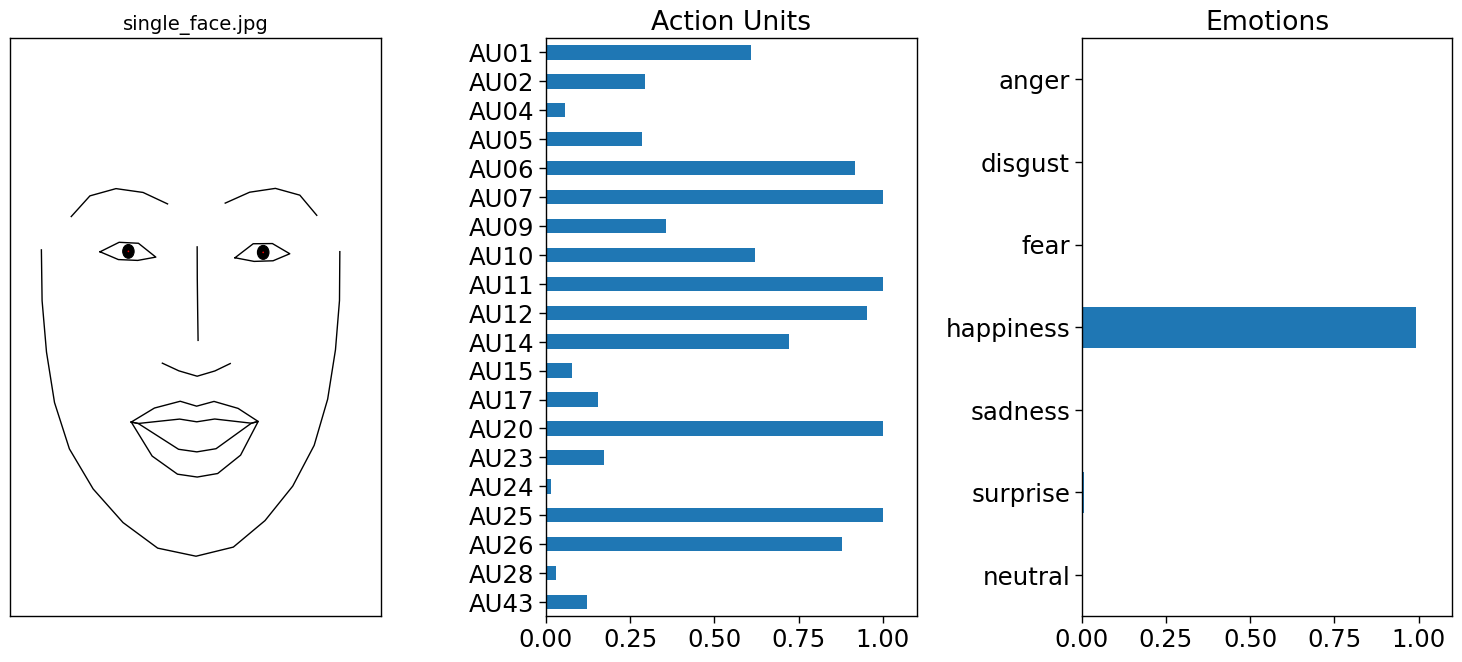

In [31]:
# faces='aus' for lines of the AUs, without default is settled -> lines on image
figs = single_face_prediction.plot_detections(poses=True, faces='aus')

By default `.plot_detections()` will overlay facial lines on top of the input image. However, it's also possible to visualize a face using Py-Feat's standardized AU landmark model, which takes the detected AUs and projects them onto a template face. You an control this by change by setting `faces='aus'` instead of the default `faces='landmarks'`. For more details about this kind of visualization see the [visualizing facial expressions](./04_plotting.ipynb) and the [creating an AU visualization model](../extra_tutorials/06_trainAUvisModel.ipynb) tutorials:

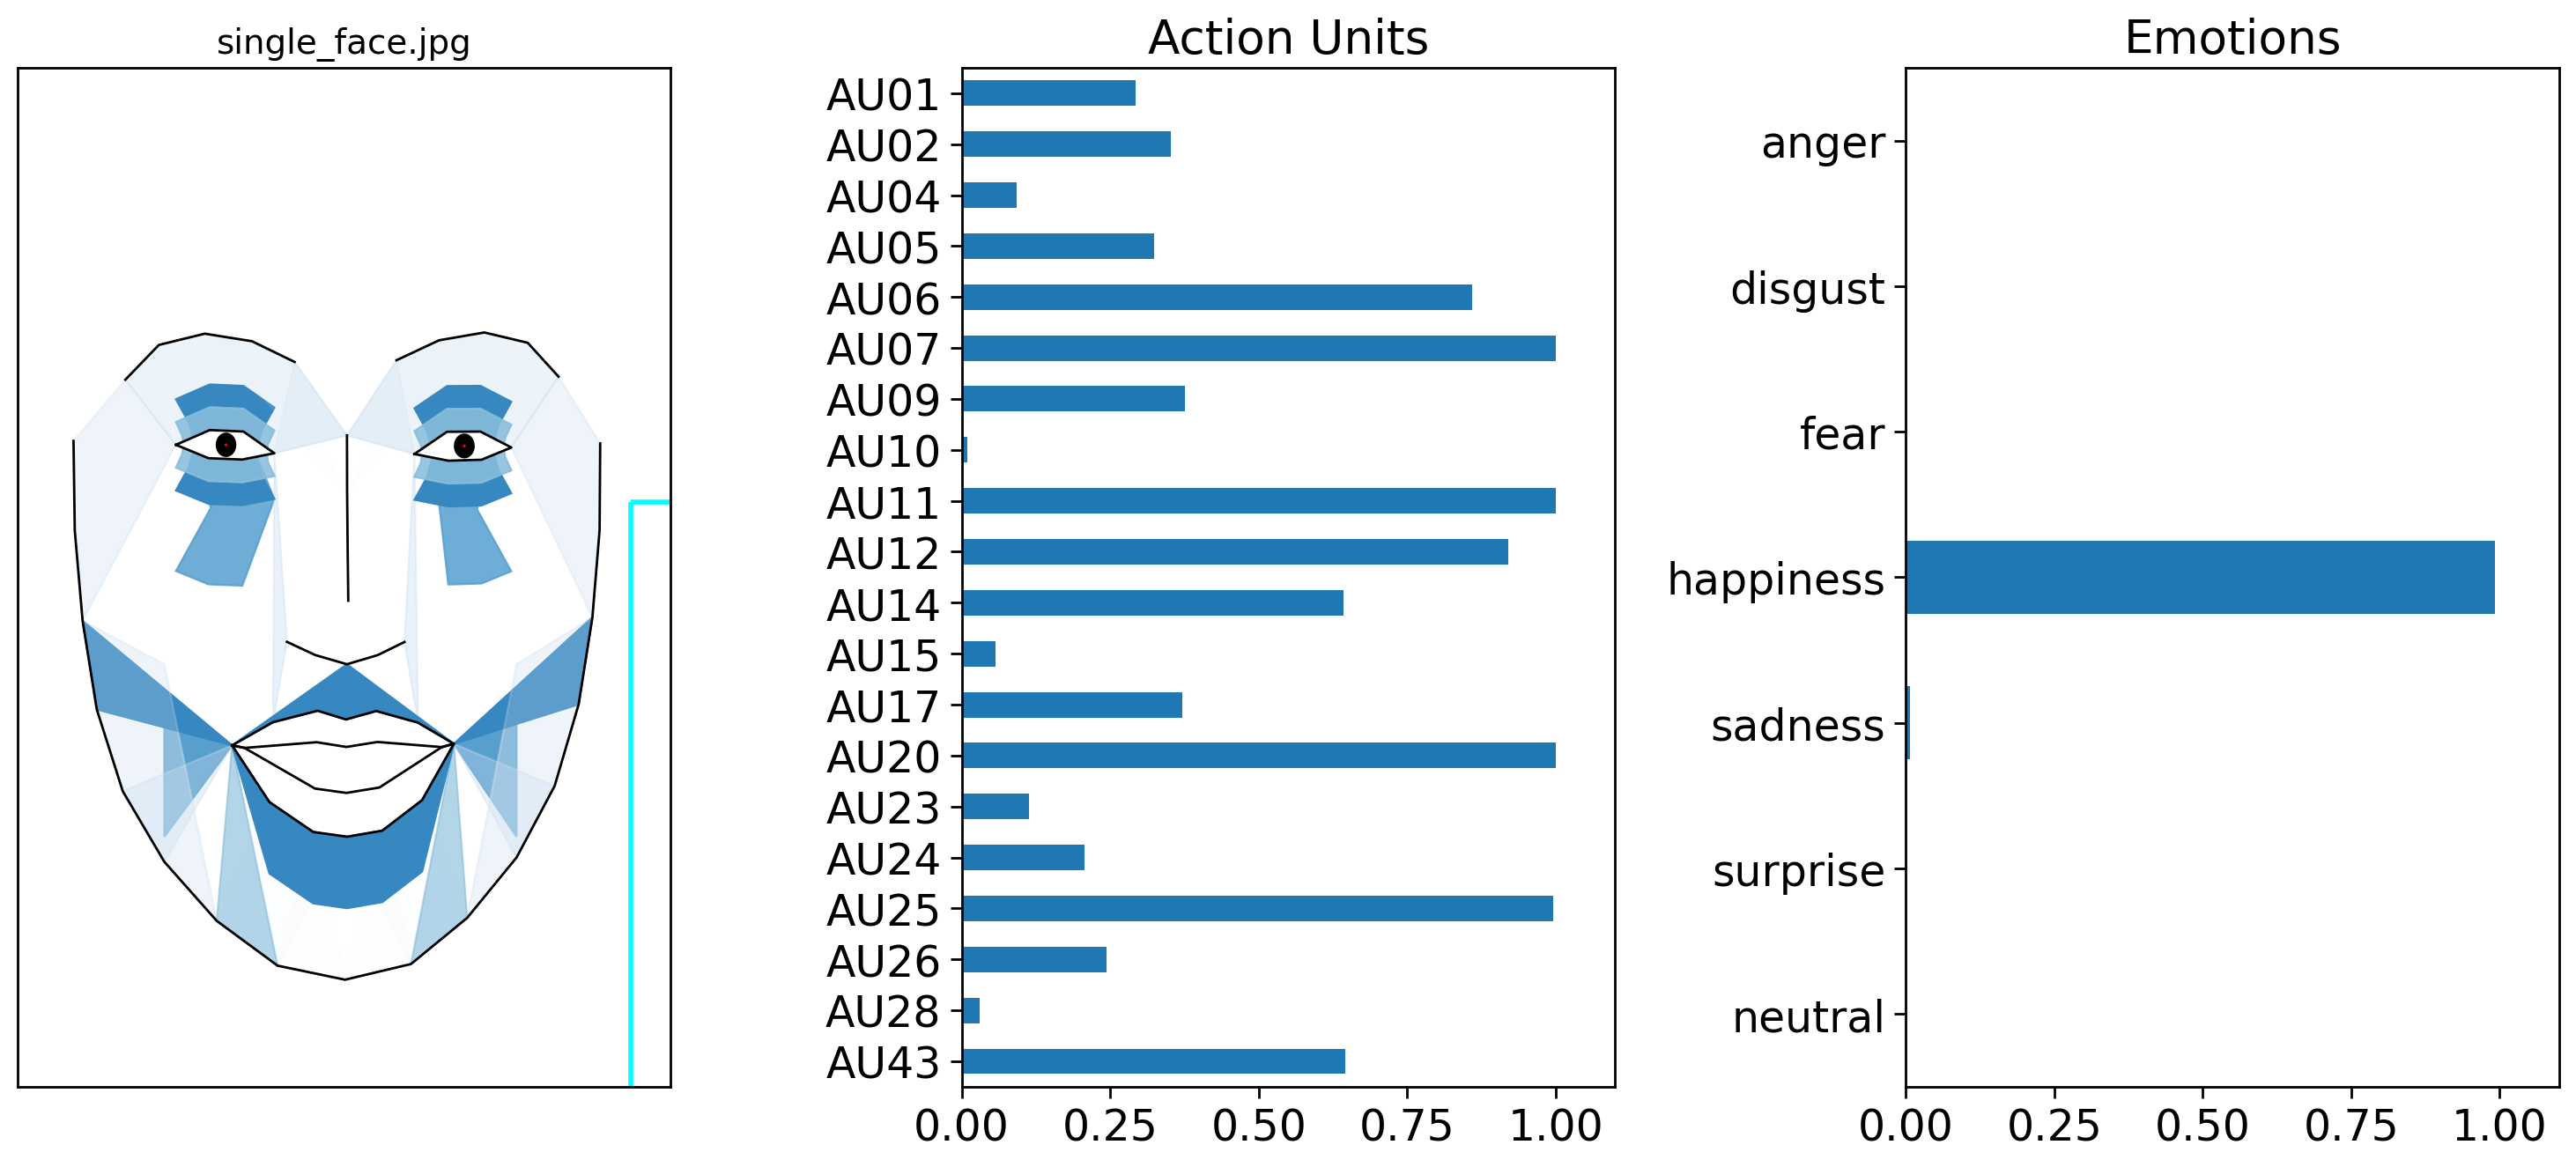

In [ ]:
figs = single_face_prediction.plot_detections(faces="aus", muscles=True)

### Interactive Plotting

You can also use the `.iplot_detections()` method to generate an interactive plotly figure that lets you interactively enable/disable various detector outputs:

In [ ]:
single_face_prediction.iplot_detections(bounding_boxes=True, emotions=True)

## 1.6 Detecting multiple faces from a single image

A `Detector` will automatically find multiple faces in a single image and will create 1 row per detected face in the `Fex` object it outputs.

Notice how `image_prediction` is now a `Fex` instance with 5 rows, one for each detected face. We can confirm this by plotting our detection results like before:

In [ ]:
multi_face_image_path = os.path.join(test_data_dir, "multi_face.jpg")
multi_face_prediction = detector.detect(multi_face_image_path, data_type="image")

# Show results
multi_face_prediction

100%|██████████| 1/1 [00:01<00:00,  1.44s/it]


FaceRectX  FaceRectY  FaceRectWidth  FaceRectHeight  FaceScore         x_0  \
0      663.0      263.0          150.0           180.0   0.998755  683.637024   
1      512.0      284.0          140.0           172.0   0.997860  532.246399   
2      290.0      215.0          135.0           160.0   0.991971  311.675385   
3      192.0       35.0          131.0           154.0   0.963654  216.397369   
4      413.0      193.0          112.0           134.0   0.903046  435.238007   

          x_1         x_2         x_3         x_4  ...  Identity_508  \
0  682.256287  681.580444  682.637024  686.754944  ...     -0.030578   
1  530.987976  530.478943  531.346313  534.563416  ...      0.020770   
2  313.203674  315.590179  319.633240  326.428802  ...     -0.065147   
3  214.710068  213.856934  214.397079  217.525269  ...      0.040147   
4  435.729736  436.857910  439.002228  442.800690  ...      0.042136   

   Identity_509  Identity_510  Identity_511  Identity_512  \
0      0.057009     -0.027664      0.055146      0.074115   
1      0.074040     -0.061894      0.024235      0.058015   
2     -0.021230     -0.057268     -0.008089      0.035251   
3      0.028400     -0.029841      0.040843     -0.055877   
4      0.047004     -0.001307      0.041147      0.046738   

                                               input  frame  FrameHeight  \
0  /Users/esh/Documents/pypackages/py-feat/feat/t...      0        667.0   
1  /Users/esh/Documents/pypackages/py-feat/feat/t...      0        667.0   
2  /Users/esh/Documents/pypackages/py-feat/feat/t...      0        667.0   
3  /Users/esh/Documents/pypackages/py-feat/feat/t...      0        667.0   
4  /Users/esh/Documents/pypackages/py-feat/feat/t...      0        667.0   

   FrameWidth  Identity  
0      1000.0  Person_0  
1      1000.0  Person_1  
2      1000.0  Person_2  
3      1000.0  Person_3  
4      1000.0  Person_4  

[5 rows x 691 columns]

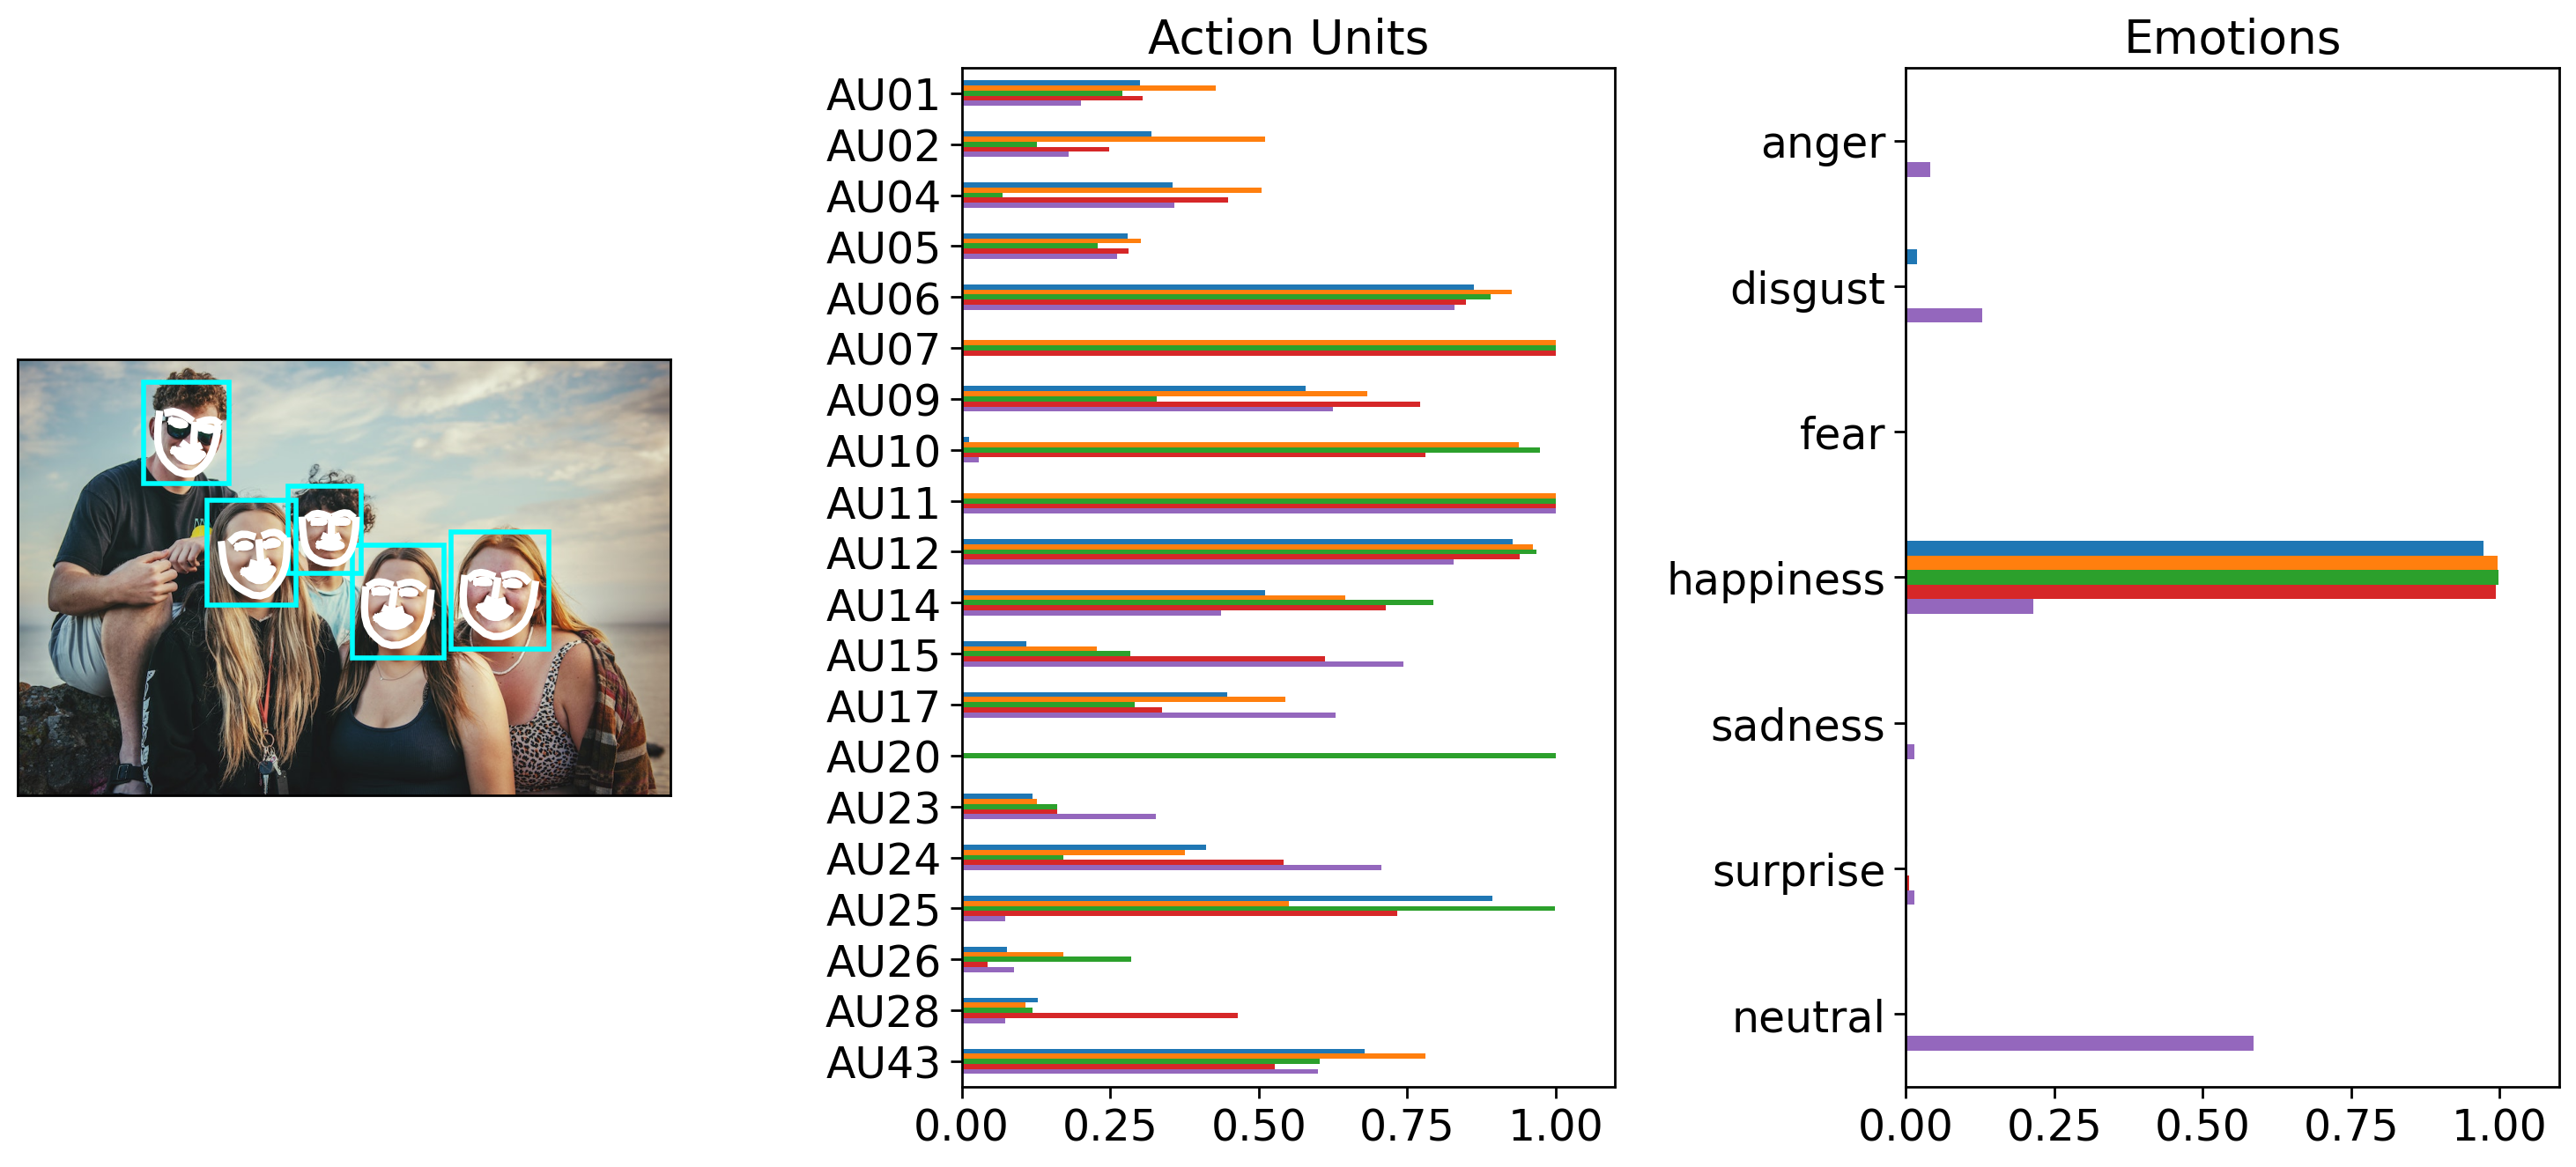

In [ ]:
figs = multi_face_prediction.plot_detections(add_titles=False)

## 1.7 Working with multiple images

`Detector` is also flexible enough to process multiple image files if `.detect()` is passed a list of images. By default images will be processed serially, but you can set `batch_size > 1` to process multiple images in a *batch* and speed up processing. **NOTE: All images in a batch must have the same dimensions for batch processing.** This is because behind the scenes, `Detector` is assembling a *tensor* by stacking images together. You can ask `Detector` to rescale images by padding and preserving proportions using the `output_size` in conjunction with `batch_size`. For example, the following would process a list of images in batches of 5 images at a time resizing each so one axis is 512:

`detector.detect(img_list, batch_size=5, output_size=512) # without output_size this would raise an error if image sizes differ!`

In the example below we keep things simple, by process both our single and multi-face example serislly by setting `batch_size = 1`.

Notice how the returned Fex data class instance has 6 rows: 1 for the first face in the first image, and 5 for the faces in the second image:

**NOTE: Currently batch processing images gives slightly different AU detection results due to the way that py-feat integrates the underlying models. You can examine the degree of tolerance by checking out the results of `test_detection_and_batching_with_diff_img_sizes` in our test-suite**

In [ ]:
img_list = [single_face_img_path, multi_face_image_path]

mixed_prediction = detector.detect(img_list, batch_size=1, data_type="image")
mixed_prediction

100%|██████████| 2/2 [00:02<00:00,  1.02s/it]


FaceRectX  FaceRectY  FaceRectWidth  FaceRectHeight  FaceScore         x_0  \
0      163.0      131.0          246.0           307.0   0.999693  188.409531   
1      663.0      263.0          150.0           180.0   0.998755  683.637024   
2      512.0      284.0          140.0           172.0   0.997860  532.246399   
3      290.0      215.0          135.0           160.0   0.991971  311.675385   
4      192.0       35.0          131.0           154.0   0.963654  216.397369   
5      413.0      193.0          112.0           134.0   0.903046  435.238007   

          x_1         x_2         x_3         x_4  ...  Identity_508  \
0  190.764130  193.926575  197.980225  206.389160  ...      0.030200   
1  682.256287  681.580444  682.637024  686.754944  ...     -0.030578   
2  530.987976  530.478943  531.346313  534.563416  ...      0.020770   
3  313.203674  315.590179  319.633240  326.428802  ...     -0.065147   
4  214.710068  213.856934  214.397079  217.525269  ...      0.040147   
5  435.729736  436.857910  439.002228  442.800690  ...      0.042136   

   Identity_509  Identity_510  Identity_511  Identity_512  \
0      0.104360     -0.000730     -0.014038      0.044818   
1      0.057009     -0.027664      0.055146      0.074115   
2      0.074040     -0.061894      0.024235      0.058015   
3     -0.021230     -0.057268     -0.008089      0.035251   
4      0.028400     -0.029841      0.040843     -0.055877   
5      0.047004     -0.001307      0.041147      0.046738   

                                               input  frame  FrameHeight  \
0  /Users/esh/Documents/pypackages/py-feat/feat/t...      0        562.0   
1  /Users/esh/Documents/pypackages/py-feat/feat/t...      1        667.0   
2  /Users/esh/Documents/pypackages/py-feat/feat/t...      1        667.0   
3  /Users/esh/Documents/pypackages/py-feat/feat/t...      1        667.0   
4  /Users/esh/Documents/pypackages/py-feat/feat/t...      1        667.0   
5  /Users/esh/Documents/pypackages/py-feat/feat/t...      1        667.0   

   FrameWidth  Identity  
0       572.0  Person_0  
1      1000.0  Person_1  
2      1000.0  Person_2  
3      1000.0  Person_3  
4      1000.0  Person_4  
5      1000.0  Person_5  

[6 rows x 691 columns]

Calling `.plot_detections()` will now plot detections for all images the detector was passed:

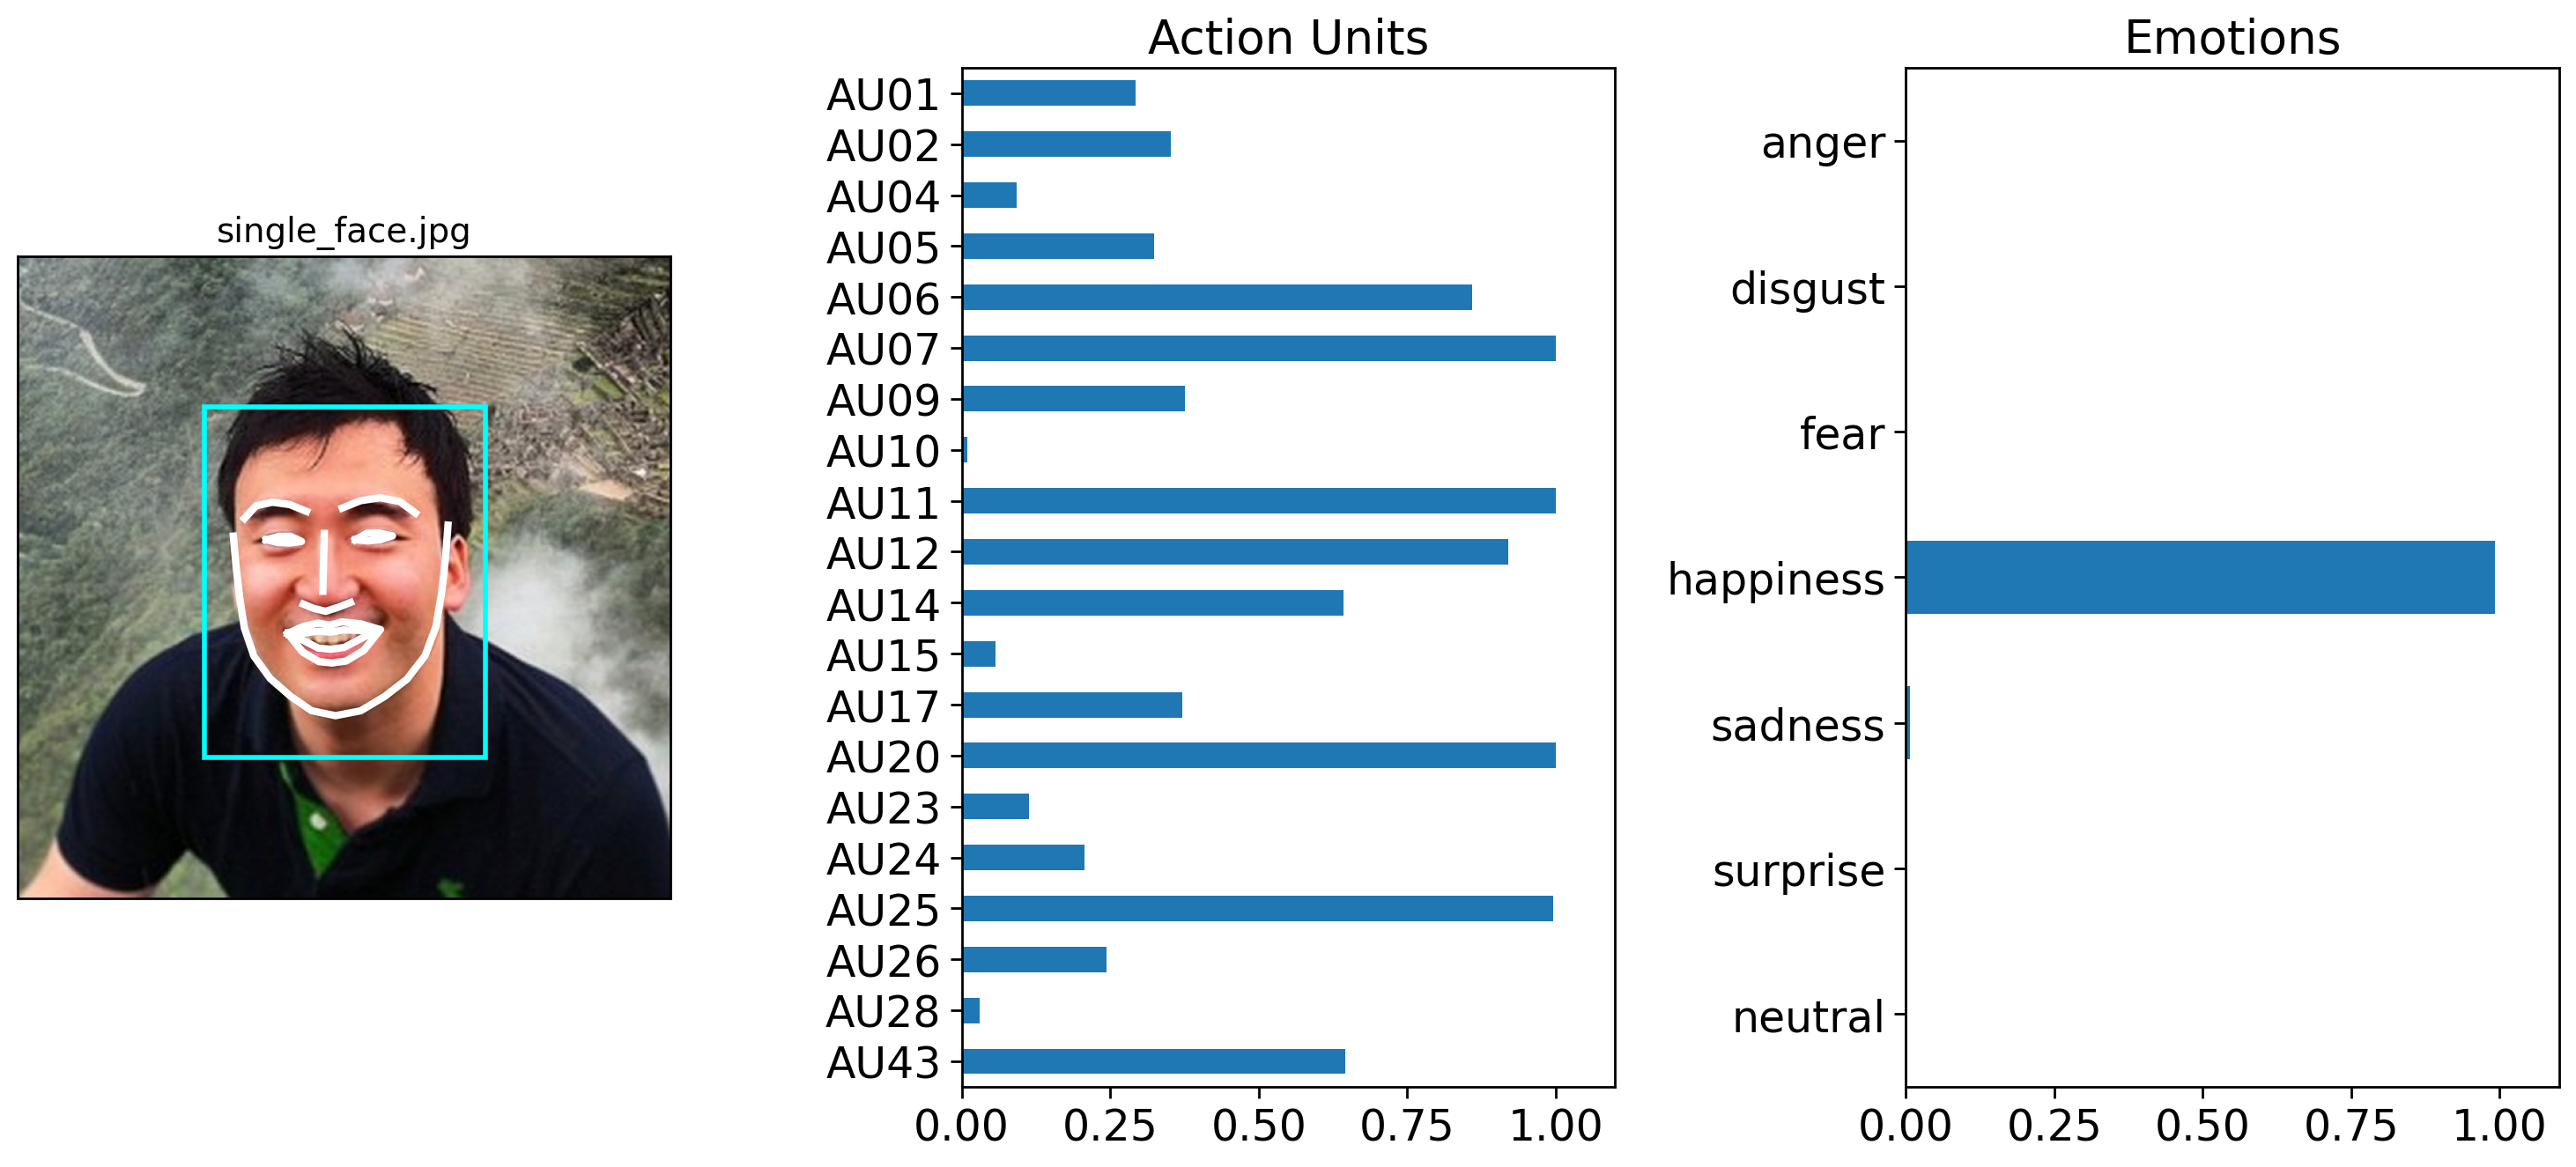

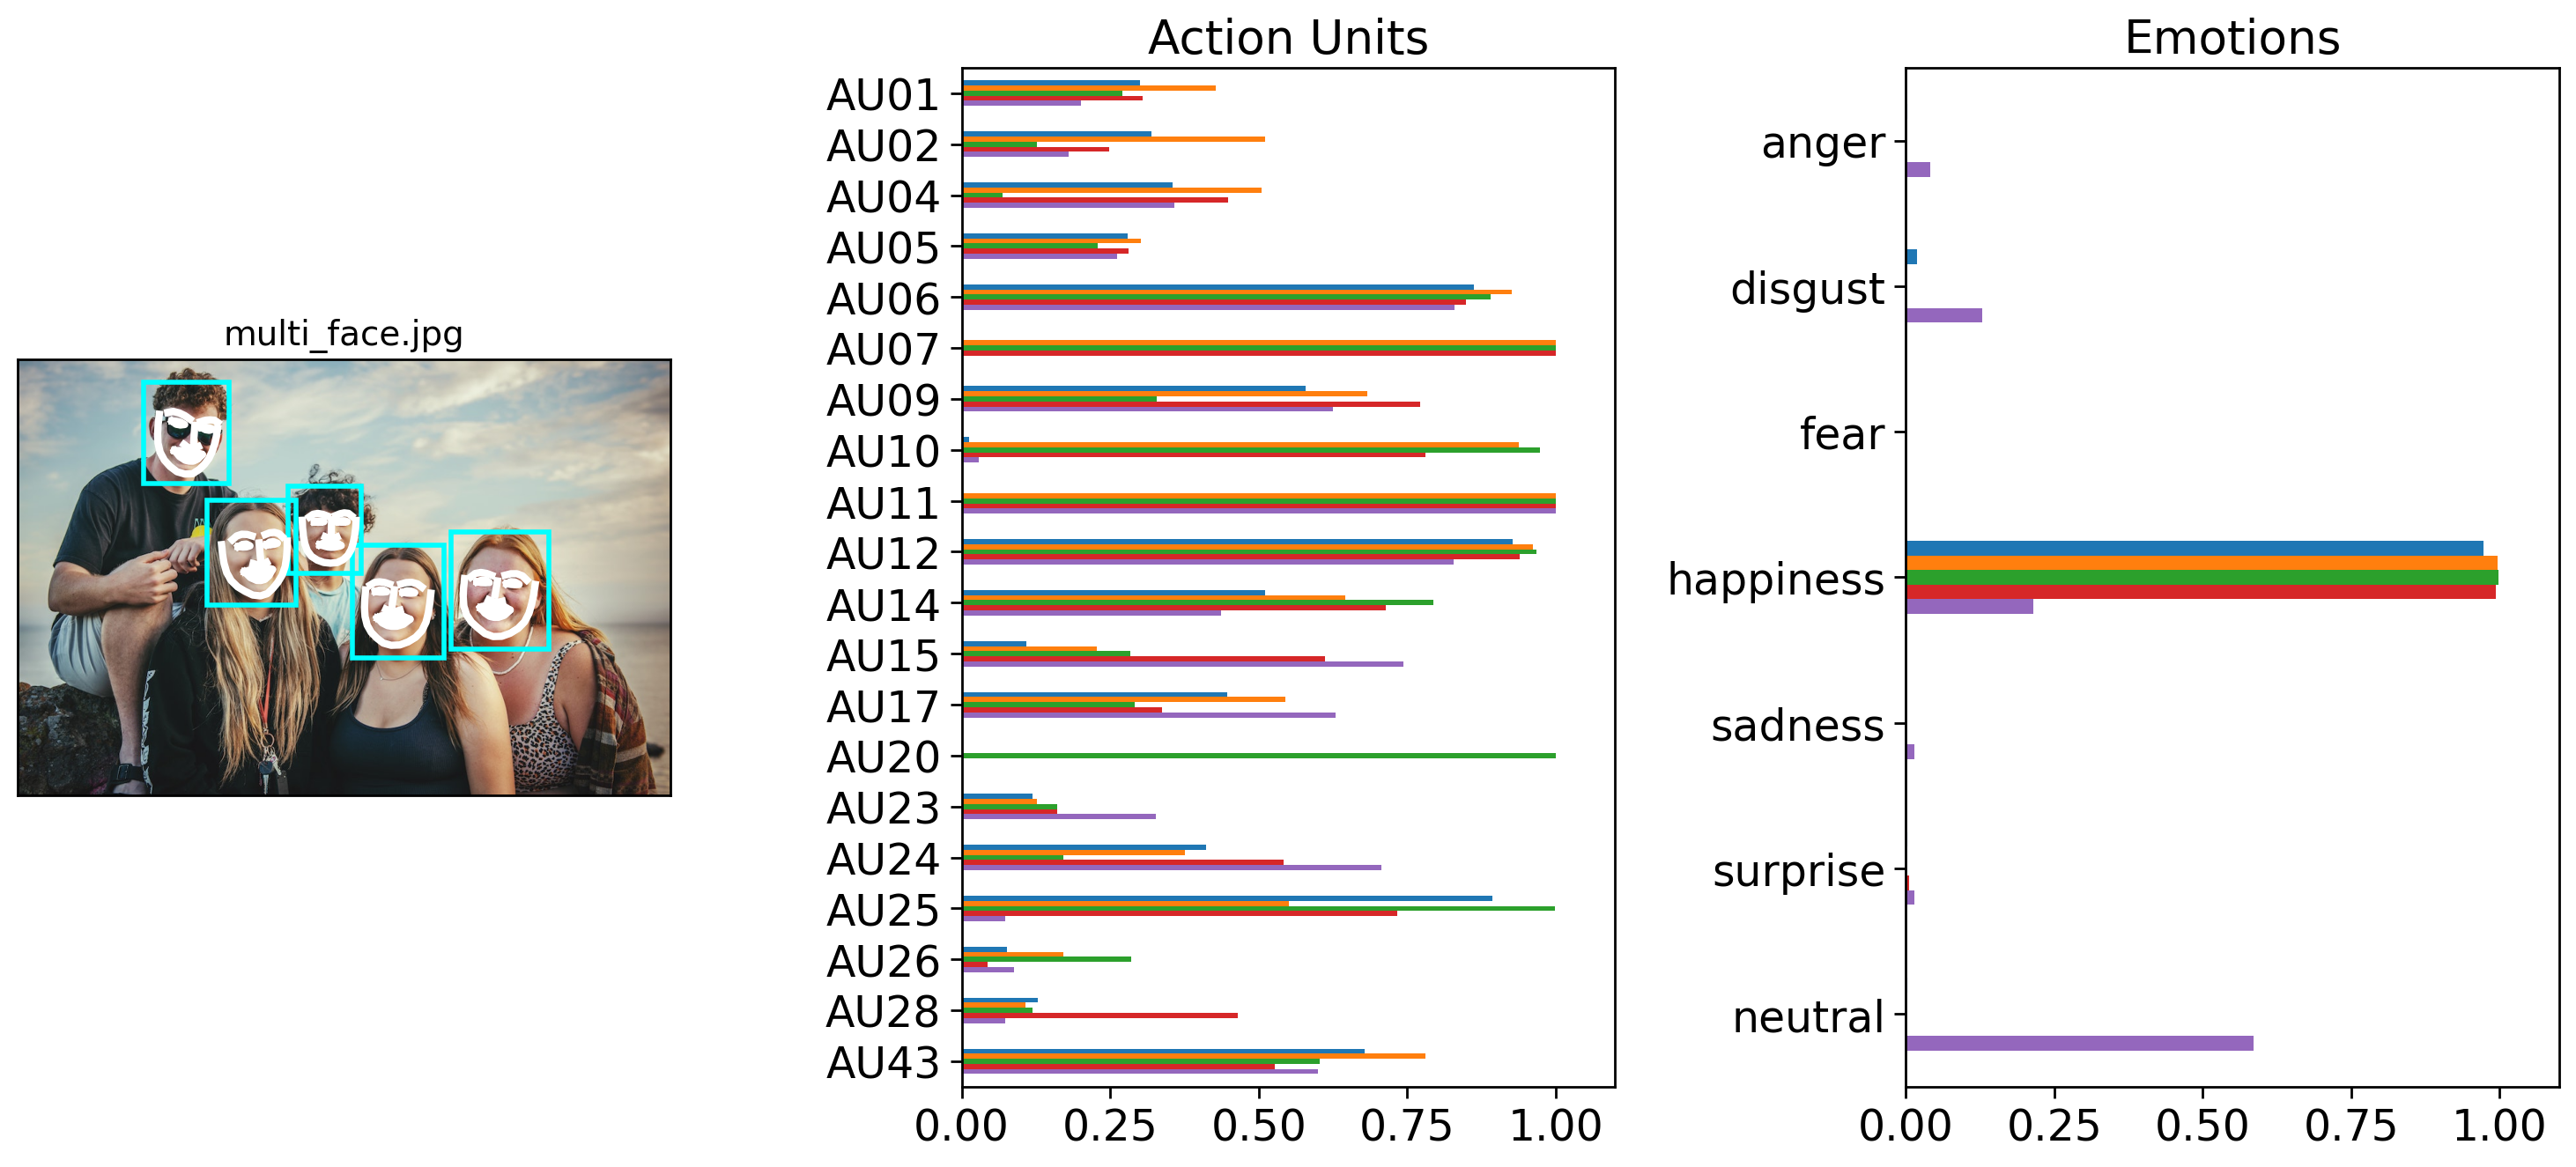

In [ ]:
figs = mixed_prediction.plot_detections()

However, it's easy to use pandas slicing sytax to just grab predictions for the image you want. For example you can use `.loc` and chain it to `.plot_detections()`:

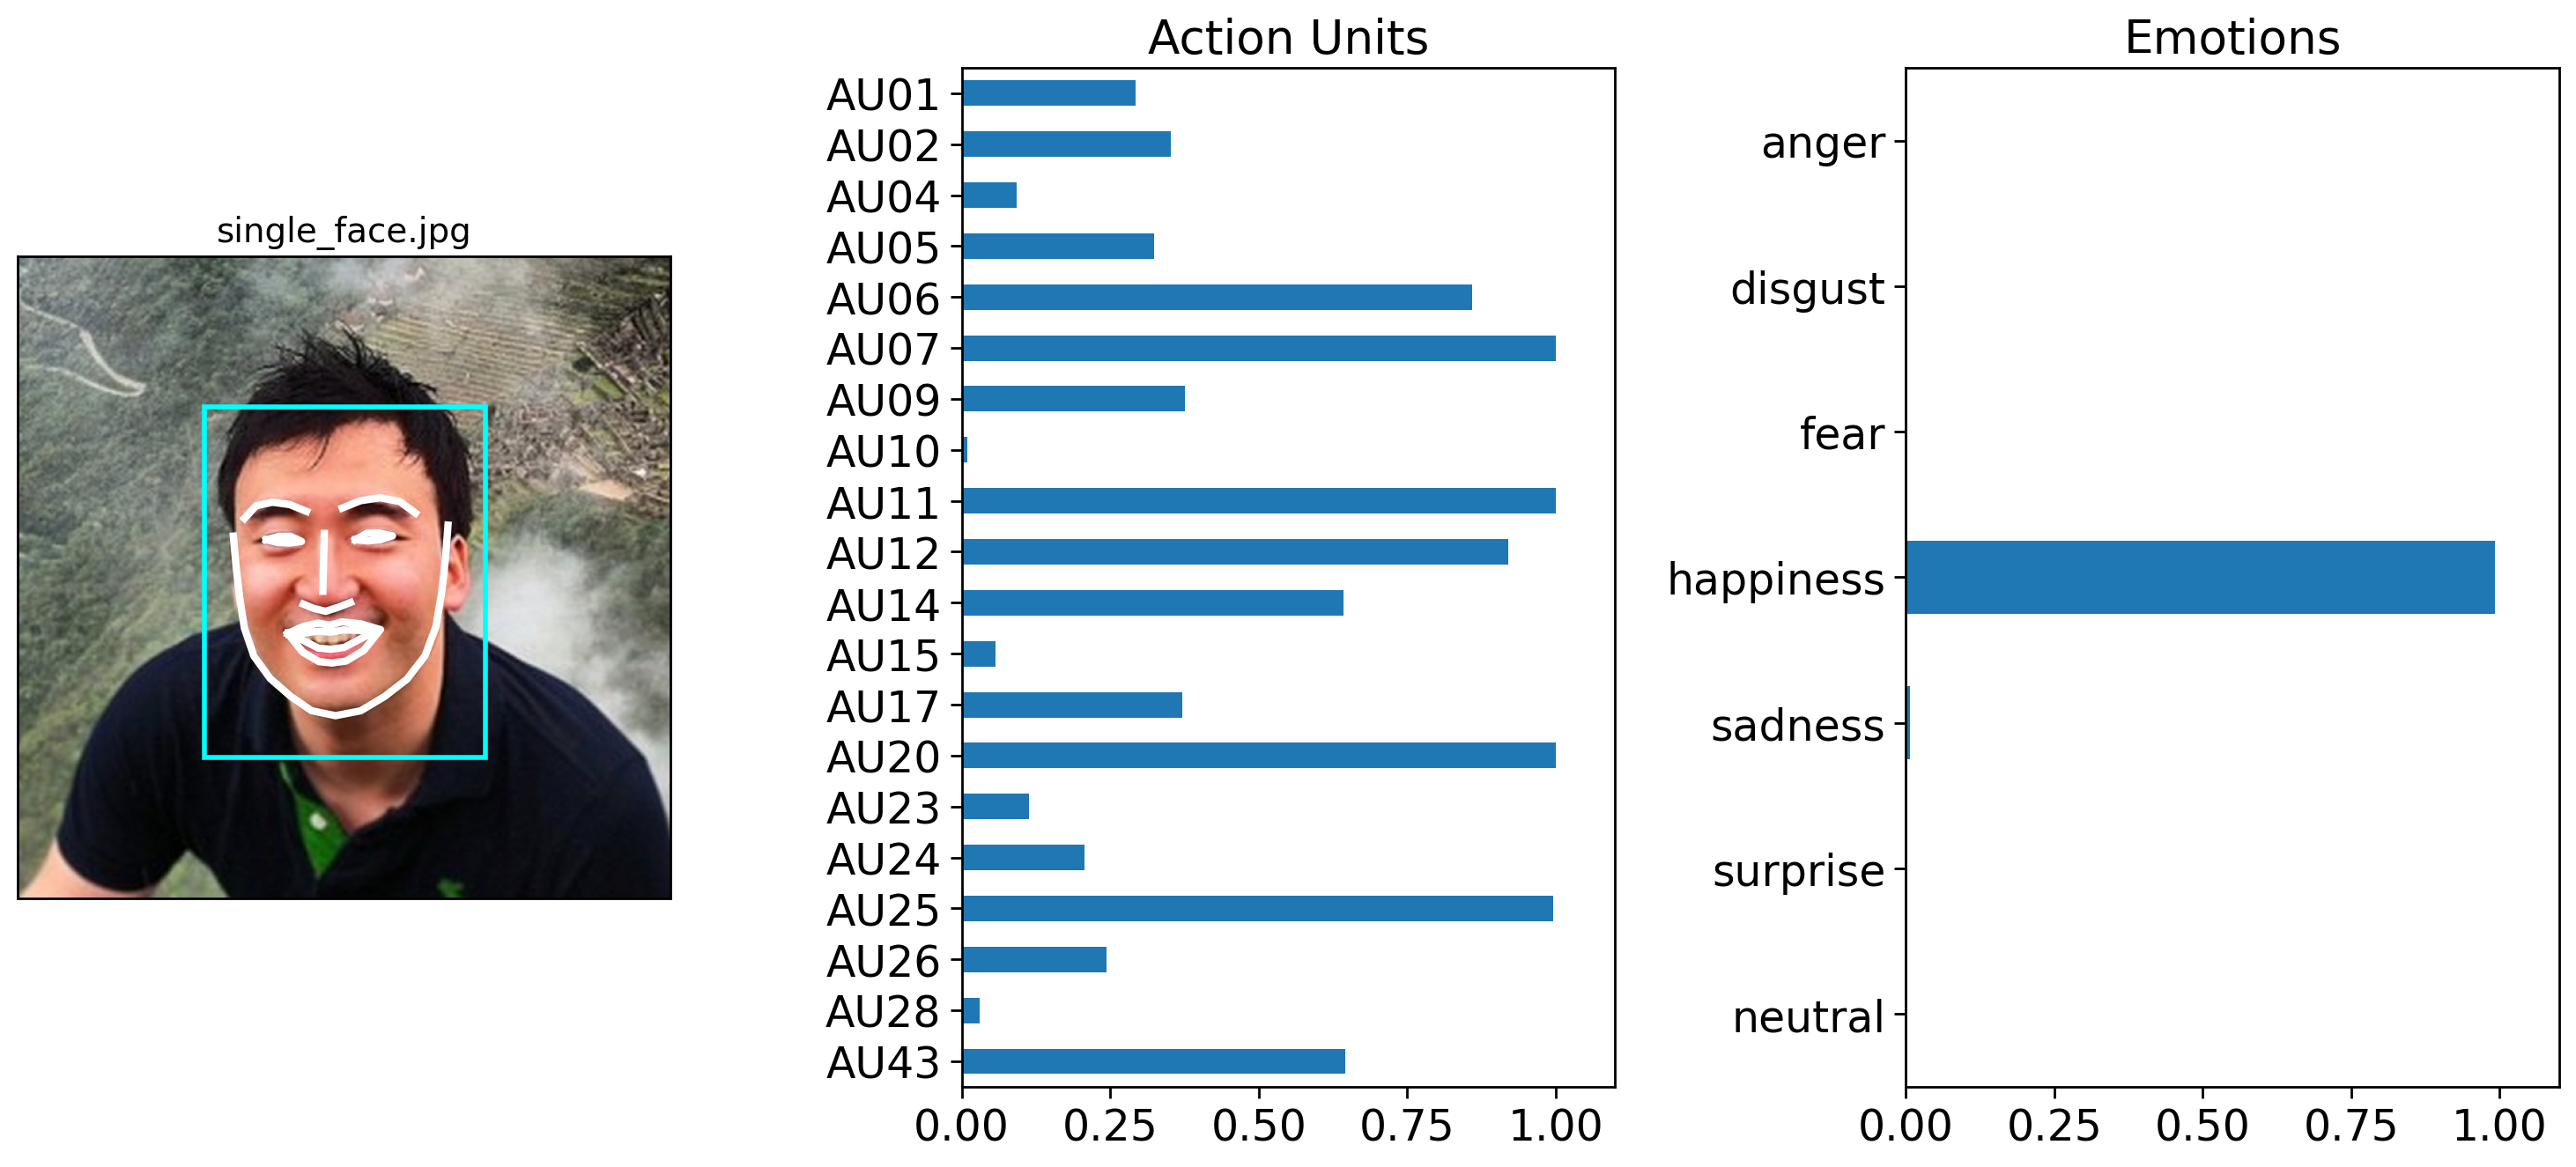

In [ ]:
# Just plot the detection corresponding to the first row in the Fex data
figs = mixed_prediction.loc[0].plot_detections()

Likewise you can use `.query()` and chain it to `.plot_detections()`. `Fex` data classes store each file path in the `'input'` column. So we can use regular pandas methods like `.unique()` to get all the unique images (2 in our case) and pick the second one.

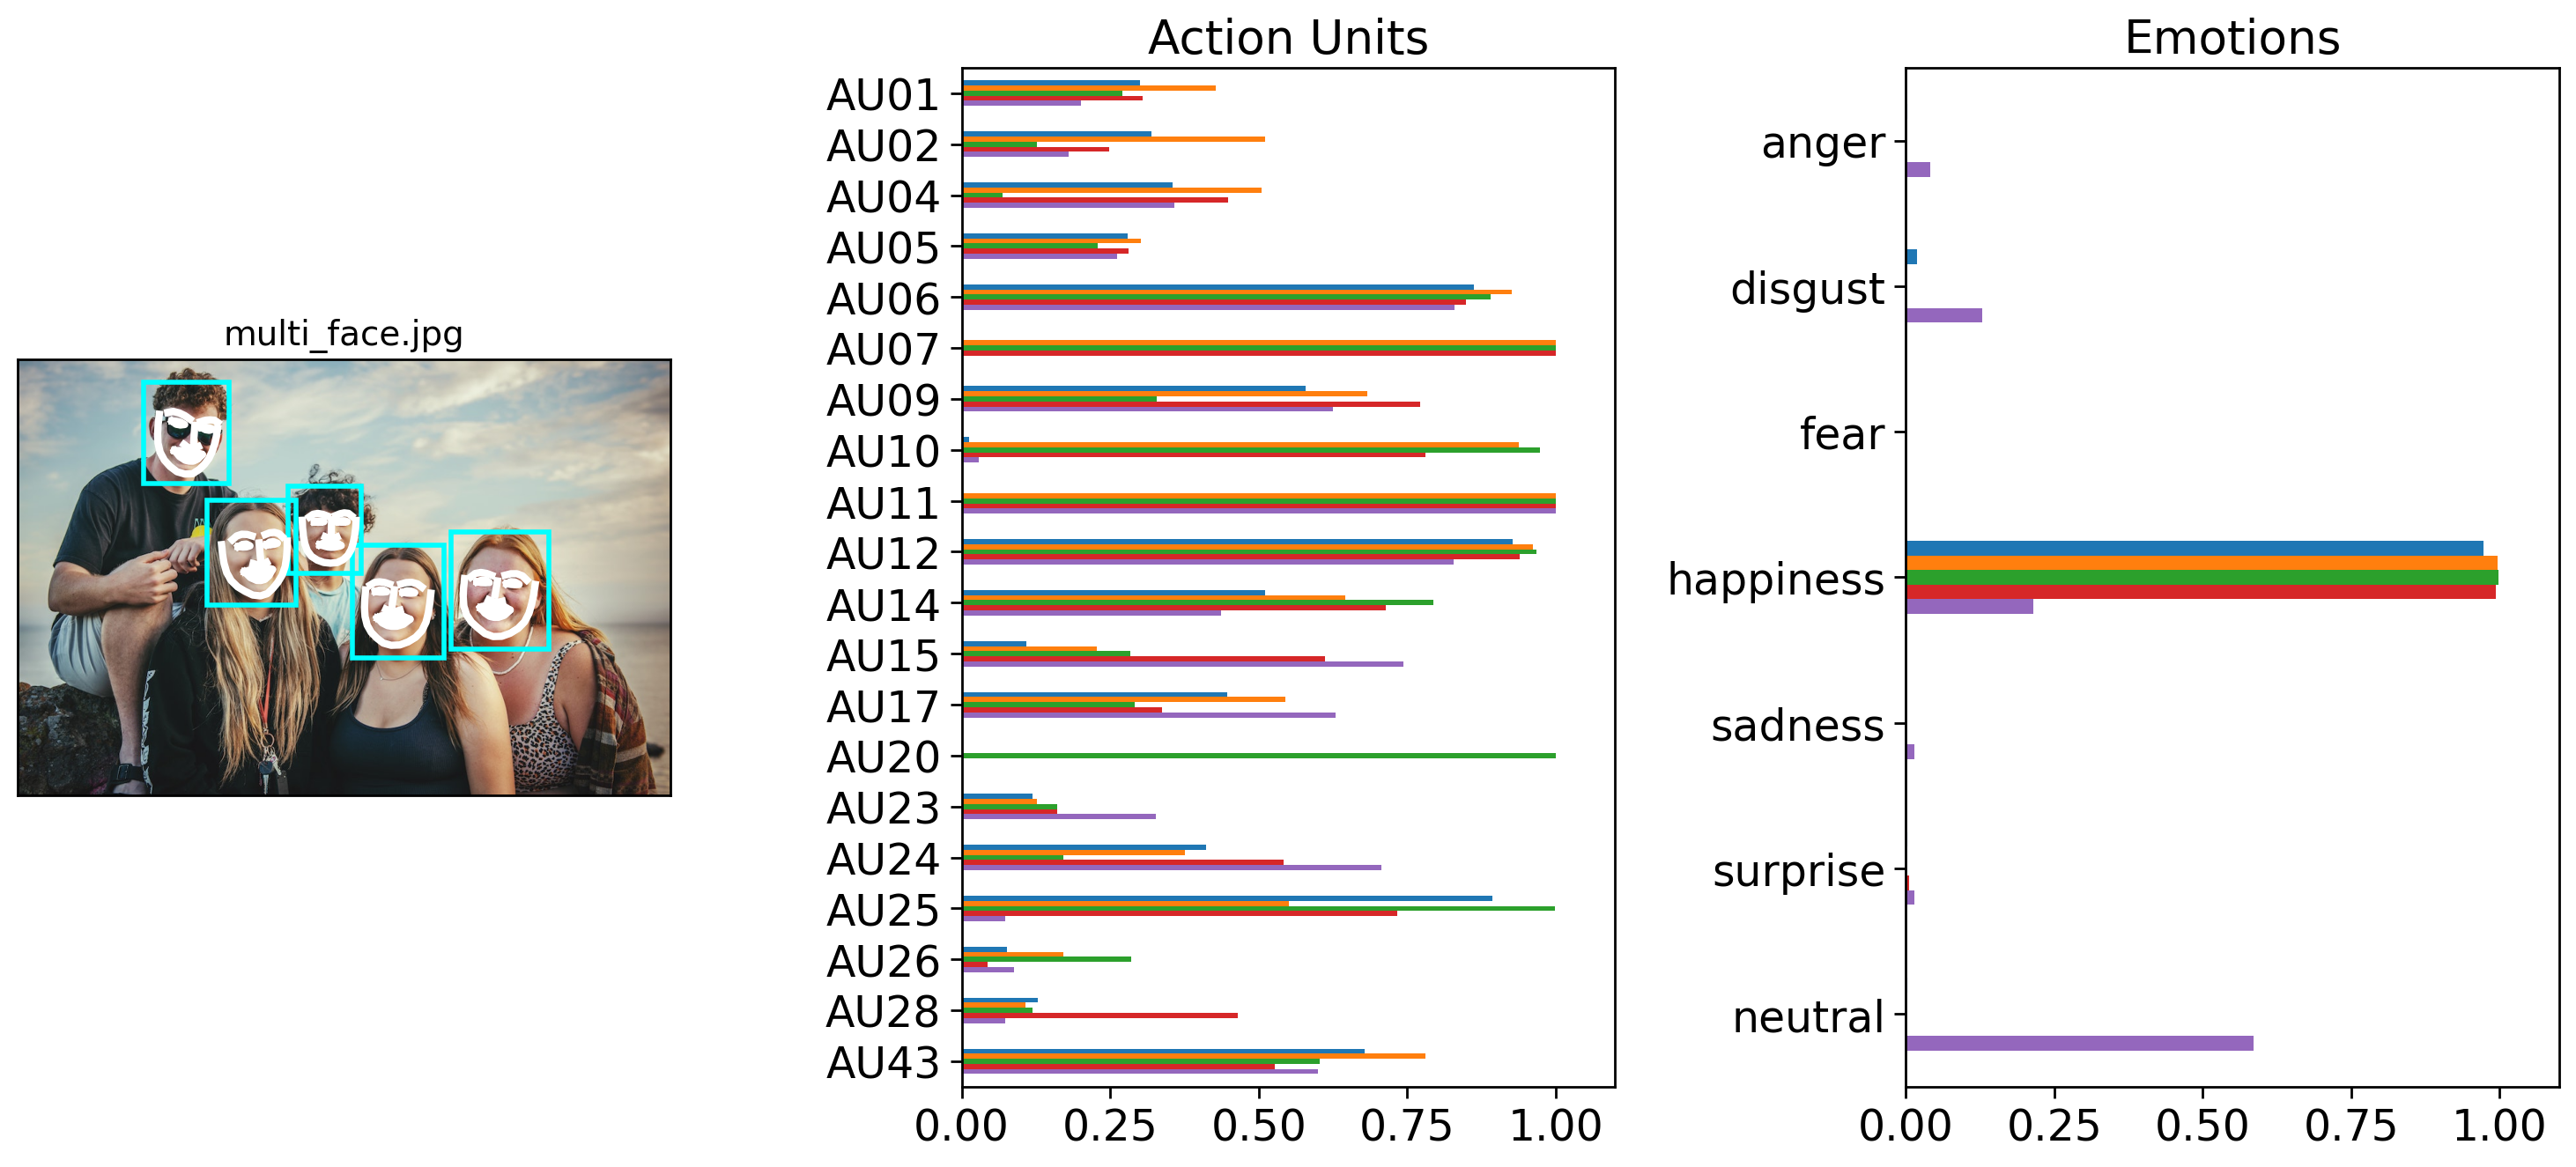

In [ ]:
# Choose plot based on image file name
img_name = mixed_prediction["input"].unique()[1]
axes = mixed_prediction.query("input == @img_name").plot_detections()